In [36]:
import pandas as pd
import seaborn as sns
import numpy as np
from ultils import *

### Prosody Feats

In [41]:
prosody = pd.read_csv('/export/b15/afavaro/Frontiers/submission/Statistical_Analysis/ITALIAN_PD/Acoustic/Prosody/B1_prosody.csv')
prosody1 = pd.read_csv('/export/b15/afavaro/Frontiers/submission/Statistical_Analysis/ITALIAN_PD/Acoustic/Prosody/B2_prosody.csv')
prosody2 = pd.read_csv('/export/b15/afavaro/Frontiers/submission/Statistical_Analysis/ITALIAN_PD/Acoustic/Prosody/FBR1_prosody.csv')
tot = pd.concat([prosody, prosody1, prosody2])
tot = tot.drop(columns='Unnamed: 0')
tot = tot.sort_values(by='id')
intensity = pd.read_csv('/export/b15/afavaro/Frontiers/submission/Statistical_Analysis/ITALIAN_PD/Acoustic/Prosody/Harmonics.csv')
intensity = intensity.drop(columns='Unnamed: 0')
intensity = intensity.sort_values(by='sound_filepath')
intensity_std = intensity['stddev_intensity'].tolist()
tot.insert(0, 'intensity_std',  intensity_std)

In [45]:
prosody = tot.drop(columns=['F0avg', 'F0max', 'F0min', 'F0kurt', 'F0skew',
'F0tiltavg',
'F0mseavg', 
'F0tiltstd',
'F0msestd',
'F0tiltmax',
'F0msemax',
'F0tiltmin',
'F0msemin',
'F0tiltskw',
'F0mseskw',
'F0tiltku',
'F0mseku',
'1F0mean',
#'1F0std',
'1F0max',
'1F0min',
'1F0skw',
'1F0ku',
'lastF0avg',
'lastF0std',
'lastF0max',
'lastF0min',
'lastF0skw',
'lastF0ku',
'avgEvoiced',
'stdEvoiced',
'skwEvoiced',
'kurtosisEvoiced',
'avgtiltEvoiced',
'stdtiltEvoiced',
'skwtiltEvoiced',
'kurtosistiltEvoiced',
'avgmseEvoiced',
'stdmseEvoiced',
'skwmseEvoiced',
'kurtosismseEvoiced',
'avg1Evoiced',
'std1Evoiced',
'max1Evoiced',
'min1Evoiced',
'skw1Evoiced',
'kurtosis1Evoiced',
'avglastEvoiced',
'stdlastEvoiced',
'maxlastEvoiced',
'minlastEvoiced',
'skwlastEvoiced',
'kurtosislastEvoiced',
'avgEunvoiced',
'stdEunvoiced',
'skwEunvoiced',
'kurtosisEunvoiced',
'avgtiltEunvoiced',
'stdtiltEunvoiced',
'skwtiltEunvoiced',
'kurtosistiltEunvoiced',
'avgmseEunvoiced',
'stdmseEunvoiced',
'skwmseEunvoiced',
'kurtosismseEunvoiced',
'avg1Eunvoiced',
'std1Eunvoiced',
'max1Eunvoiced',
'min1Eunvoiced',
'skw1Eunvoiced',
'kurtosis1Eunvoiced',
'avglastEunvoiced',
'stdlastEunvoiced',
'maxlastEunvoiced',
'minlastEunvoiced',
'skwlastEunvoiced',
'kurtosislastEunvoiced',
'Vrate',
'avgdurvoiced',
'stddurvoiced',
'skwdurvoiced',
'kurtosisdurvoiced',
'maxdurvoiced',
'mindurvoiced',
'avgdurunvoiced',
'stddurunvoiced',
'skwdurunvoiced',
'kurtosisdurunvoiced',
'maxdurunvoiced',
'mindurunvoiced',
'avgdurpause',
'stddurpause',
'skwdurpause',
'kurtosisdurpause',
'maxdurpause',
'mindurpause',
'PVU',
'PU',
'UVU',
'VVU',
'VP',
'UP'])

In [46]:
prosody['label']=prosody['id'].str.split('_').str[0]
tasks = []
names =prosody['id'].tolist()
for e in names:
    ok = e.split("_", 3)[3]
    ok = ok[:2]
    tasks.append(ok)
prosody['tasks'] = tasks
df = prosody
df = df.drop(columns=['id'])
 #here we extract the values by task
task_grouped_= df.groupby('tasks')
B1 = task_grouped_.get_group("B1")
B2 = task_grouped_.get_group("B2")
FB1 = task_grouped_.get_group("FB")

,intensity_std,F0std,1F0std,id,label
0,12.213648,43.966045,3.934146,CN_AGNESE_P_B1APGANRET55F170320171104.wav,CN
0,14.120050,43.835258,42.562552,CN_AGNESE_P_B2APGANRET55F170320171105.wav,CN
0,15.338148,34.803506,15.886904,CN_AGNESE_P_FB1APGANRET55F170320171115.wav,CN
1,17.002530,37.380330,25.398653,CN_ANGELA_C_B1ACNAGRER49F210320170916.wav,CN
1,13.586658,37.395260,34.090185,CN_ANGELA_C_B2ACNAGRER49F210320170919.wav,CN
...,...,...,...,...,...
58,17.553182,29.567412,21.136429,PD_Vito_S_B2VSIPTIOZ46M240120171922.wav,PD
59,46.054947,18.756348,23.045531,PD_Vito_S_B2vsiptioz46M1606161701.wav,PD
44,26.307974,24.520260,11.159868,PD_Vito_S_FB1VSIOTLOP47M100220171338.wav,PD
45,21.736433,41.468786,32.763151,PD_Vito_S_FB1VSIPTIOZ46M240120171936.wav,PD


## First read passage

In [52]:
grouped = B1.groupby("label") #here we extract the values by category
control = grouped.get_group("CN") 
parkinson_ = grouped.get_group("PD")
task = B1.columns[0:-2].values.tolist()
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(B1.columns[0:-2])])
control_all_feat = np.array([control[feat] for feat in np.array(B1.columns[0:-2])])

with open('/export/b15/afavaro/Frontiers/submission/ITALIAN/ACOUSTIC/PROSODY/Results/b1_rt_new.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")

kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/ITALIAN/ACOUSTIC/PROSODY/Results/b1_rt_new.txt')
holm_correction(kruskal_1)

(['kruskal results for intensity_std controls vs. parkinson 1.0253432215872772e-08 ',
  'kruskal results for F0std controls vs. parkinson 0.0011518622789287928 '],
 [3.076029664761832e-08, 0.0017277934183931893])

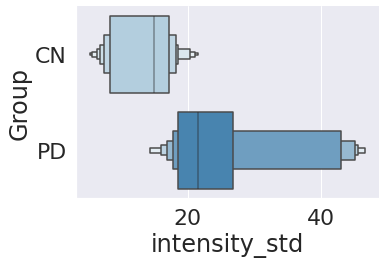

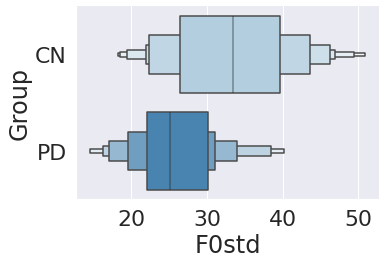

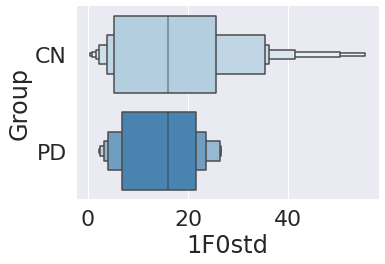

In [53]:
for i, title in enumerate(task):  
    
    nome = title
    controls = []
    parkinson=[]
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]
    [controls.append('CN') for value in range(len(control_all_feat[i]))]
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
    lista = controls+parkinson
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)

## Second read passage

In [54]:
grouped = B2.groupby("label") #here we extract the values by category
control = grouped.get_group("CN") 
parkinson_ = grouped.get_group("PD")
task = B2.columns[0:-3].values.tolist()
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(B2.columns[0:-3])])
control_all_feat = np.array([control[feat] for feat in np.array(B2.columns[0:-3])])


with open('/export/b15/afavaro/Frontiers/submission/ITALIAN/ACOUSTIC/PROSODY/Results/b2_rt_new.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")

kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/ITALIAN/ACOUSTIC/PROSODY/Results/b2_rt_new.txt')
holm_correction(kruskal_1)

(['kruskal results for intensity_std controls vs. parkinson 2.5422674650085972e-08 ',
  'kruskal results for F0std controls vs. parkinson 0.0021360290713834666 '],
 [5.0845349300171945e-08, 0.0021360290713834666])

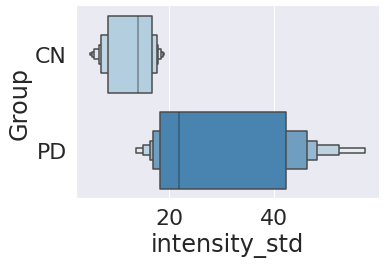

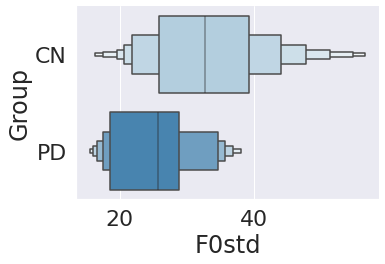

In [55]:
for i, title in enumerate(task):
    nome = title
    controls = []
    parkinson=[]
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]
    [controls.append('CN') for value in range(len(control_all_feat[i]))]
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
    lista = controls+parkinson
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)

## Text Dependent Utterances

In [56]:
grouped = FB1.groupby("label") #here we extract the values by category
control = grouped.get_group("CN") 
parkinson_ = grouped.get_group("PD")
task = FB1.columns[0:-3].values.tolist()
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(FB1.columns[0:-3])])
control_all_feat = np.array([control[feat] for feat in np.array(FB1.columns[0:-3])])

        
with open('/export/b15/afavaro/Frontiers/submission/ITALIAN/ACOUSTIC/PROSODY/Results/fb1_rt_new.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")

kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/ITALIAN/ACOUSTIC/PROSODY/Results/fb1_rt_new.txt')
holm_correction(kruskal_1)


(['kruskal results for intensity_std controls vs. parkinson 3.307123381108414e-05 ',
  'kruskal results for F0std controls vs. parkinson 0.01157091851317232 '],
 [6.614246762216827e-05, 0.01157091851317232])

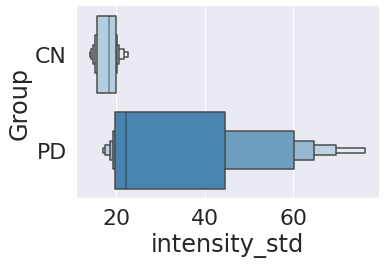

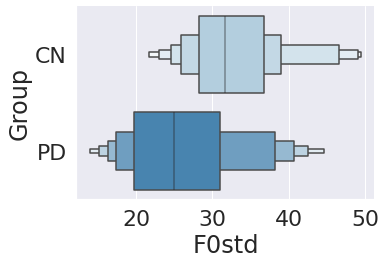

In [58]:
for i, title in enumerate(task):  
    
    nome = title
    controls = []
    parkinson=[]
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]
    [controls.append('CN') for value in range(len(control_all_feat[i]))]
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
    lista = controls+parkinson
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)
